In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
import itertools
from sklearn.feature_selection import RFE



In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists
mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets list -s "Intrusion Detection"

ref                                                          title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sampadab17/network-intrusion-detection                       Network Intrusion Detection                        818KB  2018-10-09 09:39:37          26520        206  0.47058824       
mryanm/luflow-network-intrusion-detection-data-set           LUFlow Network Intrusion Detection Data Set          5GB  2024-12-11 08:47:51           3476         76  0.8125           
what0919/intrusion-detection                                 intrusion detection                                  2MB  2017-12-29 05:51:00           3042         31  0.29411766       
tapadhirdas/unridd-intrusion-detection-dataset               UNR-IDD Intrusion D

In [ ]:
!kaggle datasets download sampadab17/network-intrusion-detection

Dataset URL: https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection
License(s): unknown
network-intrusion-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip network-intrusion-detection.zip

Archive:  network-intrusion-detection.zip
replace Test_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace Train_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
train_data = pd.read_csv('Train_data.csv')
test_data = pd.read_csv('Test_data.csv')

In [ ]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train_data.shape

(25192, 42)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train_data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


There's no missing data in the dataset.

In [ ]:
train_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
print(f' Number of duplicated rows is {train_data.duplicated().sum()}')

 Number of duplicated rows is 0


<Axes: xlabel='class', ylabel='count'>

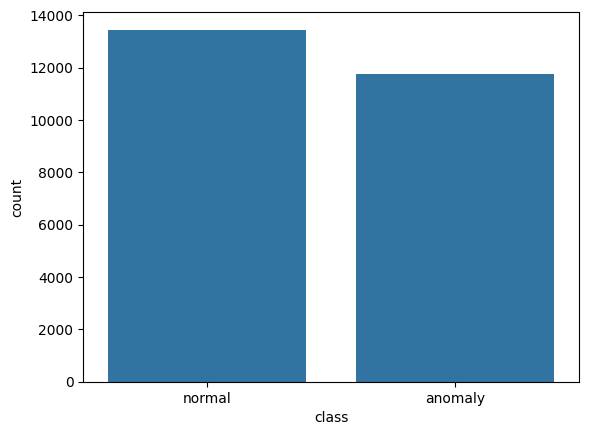

In [ ]:

sns.countplot(x=train_data['class'])

In [ ]:
print(" Data distribution per class is :")
print(train_data['class'].value_counts())

 Data distribution per class is :
class
normal     13449
anomaly    11743
Name: count, dtype: int64


Categorical Features Encoding :

In [ ]:
def label_encode(df):
  for col in df.columns:
    if df[col].dtype == 'object':
      label_encoder = LabelEncoder()
      df[col] = label_encoder.fit_transform(df[col])

label_encode(train_data)
label_encode(test_data)

In [ ]:
train_data.drop('num_outbound_cmds', axis=1, inplace=True)
test_data.drop('num_outbound_cmds', axis=1, inplace=True)

In [ ]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']

Feature Selection :

In [ ]:
rfc = RandomForestClassifier()
rfe = RFE(rfc, n_features_to_select=10)
rfe.fit(X_train, y_train)

feature_map = [(i,v) for i,v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i,v in feature_map if i==True]
print(selected_features)

['protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'count', 'same_srv_rate', 'diff_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']


In [ ]:
X_train = X_train[selected_features]
test_data = test_data[selected_features]

Data Scaling :

In [ ]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
test_data = scale.transform(test_data)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

In [ ]:
X_train.shape

(17634, 10)

In [ ]:
X_val.shape

(7558, 10)

In [ ]:
y_train.shape

(17634,)

In [ ]:
y_val.shape

(7558,)

In [ ]:
import time

In [ ]:
lg_classifier = LogisticRegression(max_iter = 12000000)
start_time = time.time()
lg_classifier.fit(X_train, y_train.values.ravel())
end_time = time.time()

print("Training time :", end_time - start_time)

Training time : 0.05979752540588379


In [ ]:
start_time = time.time()
y_pred = lg_classifier.predict(X_val)
end_time = time.time()

print("Prediction time :", end_time - start_time)


Prediction time : 0.005806922912597656


In [ ]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
lg_train_score, lg_val_score = lg_model.score(X_train, y_train), lg_model.score(X_val, y_val)

print(f' Logistic Regression Training Score : {lg_train_score}')
print(f' Logistic Regression Validation Score : {lg_val_score}')

 Logistic Regression Training Score : 0.9257116933197233
 Logistic Regression Validation Score : 0.9318602804974861


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 7.1 MB/s eta 0:00:00


In [ ]:
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [ ]:
def objective(trial):
  n_neighbors = trial.suggest_int('n_neighbors', 2, 10, log=False)
  knn_classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
  knn_classifier.fit(X_train, y_train)
  accuracy = knn_classifier.score(X_val, y_val)
  return accuracy

In [ ]:
study_KNN = optuna.create_study(direction='maximize')
study_KNN.optimize(objective, n_trials=100)
print(study_KNN.best_trial)

FrozenTrial(number=19, state=TrialState.COMPLETE, values=[0.9851812648848902], datetime_start=datetime.datetime(2024, 12, 14, 11, 3, 47, 234652), datetime_complete=datetime.datetime(2024, 12, 14, 11, 3, 48, 91821), params={'n_neighbors': 3}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_neighbors': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=19, value=None)


In [ ]:
KNN_model = KNeighborsClassifier(n_neighbors=study_KNN.best_trial.params['n_neighbors'])
KNN_model.fit(X_train, y_train)

KNN_train, KNN_test = KNN_model.score(X_train, y_train), KNN_model.score(X_val, y_val)

print(f' KNN Training Score : {KNN_train}')
print(f' KNN Validation Score : {KNN_test}')

 KNN Training Score : 0.9905863672450947
 KNN Validation Score : 0.9851812648848902


In [ ]:
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=4)
start_time = time.time()
dt_classifier.fit(X_train, y_train)
end_time = time.time()
print("Training time :", end_time - start_time)

Training time : 0.1351156234741211


In [ ]:
start_time = time.time()
y_pred = dt_classifier.predict(X_val)
end_time = time.time()
print("Prediction time :", end_time - start_time)

Prediction time : 0.002590179443359375


In [ ]:
def objective(trial):
  max_depth = trial.suggest_int('max_depth', 2, 32, log=False)
  max_features = trial.suggest_int('max_features', 2, 10, log=False)
  classifier_obj = DecisionTreeClassifier(max_depth=max_depth, max_features=max_features)
  classifier_obj.fit(X_train, y_train)
  accuracy = classifier_obj.score(X_val, y_val)
  return accuracy

In [ ]:
study_dt = optuna.create_study(direction='maximize')
study_dt.optimize(objective, n_trials=30)
print(study_dt.best_trial)

FrozenTrial(number=21, state=TrialState.COMPLETE, values=[0.9961630060862662], datetime_start=datetime.datetime(2024, 12, 14, 11, 30, 26, 140658), datetime_complete=datetime.datetime(2024, 12, 14, 11, 30, 26, 187773), params={'max_depth': 17, 'max_features': 9}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=32, log=False, low=2, step=1), 'max_features': IntDistribution(high=10, log=False, low=2, step=1)}, trial_id=21, value=None)


In [ ]:
dt = DecisionTreeClassifier(max_depth=study_dt.best_trial.params['max_depth'], max_features=study_dt.best_trial.params['max_features'])
dt.fit(X_train, y_train)
dt_train_score, dt_val_score = dt.score(X_train, y_train), dt.score(X_val, y_val)

print(f' Decision Tree Training Score : {dt_train_score}')
print(f' Decision Tree Validation Score : {dt_val_score}')


 Decision Tree Training Score : 1.0
 Decision Tree Validation Score : 0.9953691452765282


In [ ]:
data = [
    ['KNN', KNN_train, KNN_test],
    ['Logistic Regression', lg_train_score, lg_val_score],
    ['Decision Tree', dt_train_score, dt_val_score]
]

col_names = ['Model', 'Training Score', 'Validation Score']
df = pd.DataFrame(data, columns=col_names)
df

,Model,Training Score,Validation Score
0,KNN,0.990586,0.985181
1,Logistic Regression,0.925712,0.931860
2,Decision Tree,1.000000,0.995369


In [ ]:
SEED = 42

dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier()
lg_classifier = LogisticRegression()


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
models = {}
models['KNN'] = knn_classifier
models['Logistic_Regression'] = lg_classifier
models['Decision_Tree'] = dt_classifier


In [ ]:
scores = {}
for name in models:
  scores[name] = {}
  for score in ['precision', 'recall']:
    scores[name][score] = cross_val_score(models[name], X_train, y_train, cv=5, scoring=score).mean()

In [101]:
def line(name):
  return '*'*(25-len(name)//2)

for name in models:
  print(line(name), name, 'Model Validation', line(name))

  for scorer in ['precision', 'recall']:
    mean = round(np.mean(scores[name][scorer])*100, 2)
    stdev = round(np.std(scores[name][scorer])*100, 2)
    print("Mean {}:".format(scorer), '\n', mean, "%", '+-',stdev)


************************ KNN Model Validation ************************
Mean precision: 
 98.33 % +- 0.0
Mean recall: 
 98.11 % +- 0.0
**************** Logistic_Regression Model Validation ****************
Mean precision: 
 91.08 % +- 0.0
Mean recall: 
 95.33 % +- 0.0
******************* Decision_Tree Model Validation *******************
Mean precision: 
 99.47 % +- 0.0
Mean recall: 
 99.28 % +- 0.0


<ipython-input-103-37e1e566cacb>:4: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  scores = pd.DataFrame(scores).swapaxes('index', 'columns')*100


<Axes: title={'center': 'Cross Validation Scores'}>

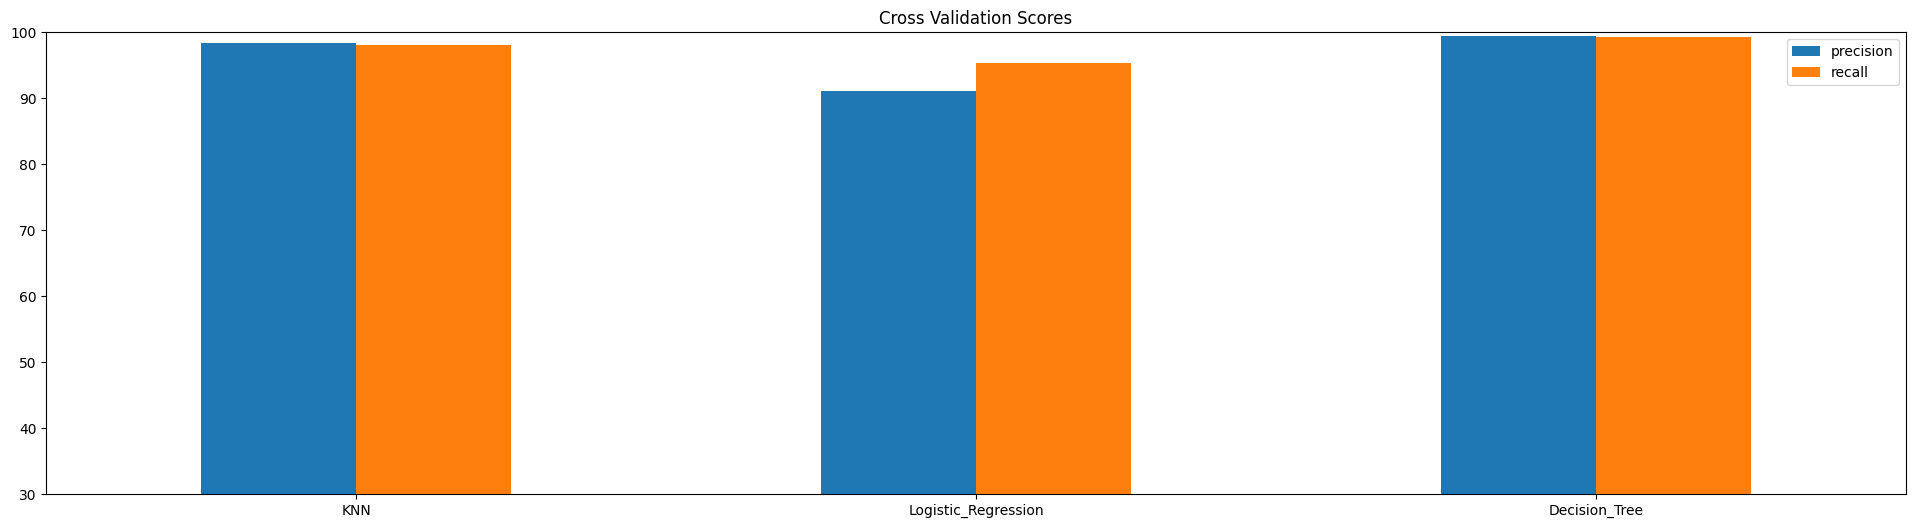

In [103]:
for name in models:
  for scorer in ['precision', 'recall']:
    scores[name][scorer] = scores[name][scorer].mean()
scores = pd.DataFrame(scores).swapaxes('index', 'columns')*100
scores.plot(kind = 'bar', title = 'Cross Validation Scores', ylim = [30,100], figsize=(24,6), rot=0)


In [106]:
preds = {}
for name in models:
  models[name].fit(X_train, y_train)
  preds[name] = models[name].predict(X_val)
print('Prediction Complete')


Prediction Complete


In [107]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score

target_names = ['normal', 'anomaly']
for name in models:
  print(line(name), name, 'Model', line(name))
  print(confusion_matrix(y_val, preds[name]))
  print(line(name))
  print(classification_report(y_val, preds[name], target_names=target_names))

************************ KNN Model ************************
[[3474   42]
 [  83 3959]]
************************
              precision    recall  f1-score   support

      normal       0.98      0.99      0.98      3516
     anomaly       0.99      0.98      0.98      4042

    accuracy                           0.98      7558
   macro avg       0.98      0.98      0.98      7558
weighted avg       0.98      0.98      0.98      7558

**************** Logistic_Regression Model ****************
[[3182  334]
 [ 181 3861]]
****************
              precision    recall  f1-score   support

      normal       0.95      0.91      0.93      3516
     anomaly       0.92      0.96      0.94      4042

    accuracy                           0.93      7558
   macro avg       0.93      0.93      0.93      7558
weighted avg       0.93      0.93      0.93      7558

******************* Decision_Tree Model *******************
[[3506   10]
 [  26 4016]]
*******************
              precision

<Axes: >

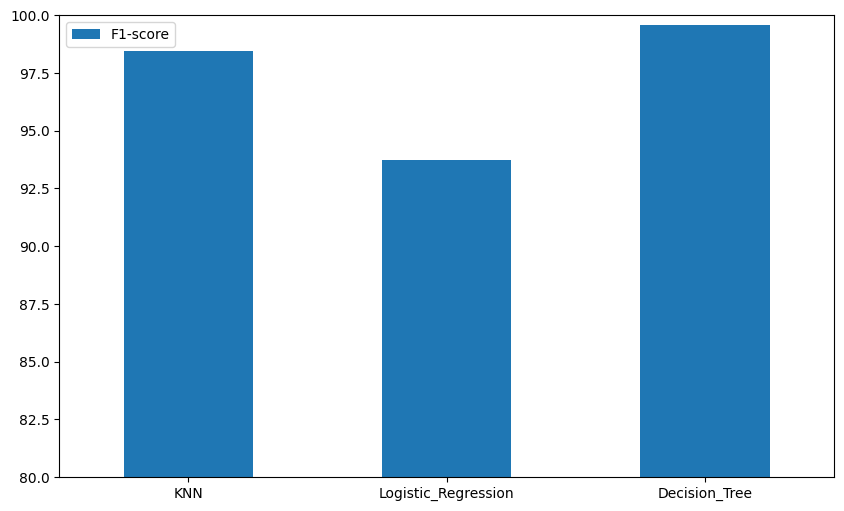

In [108]:
f1_scores = {}
for name in models:
  f1_scores[name] = f1_score(y_val, preds[name])
f1_scores = pd.DataFrame(f1_scores.values(), index=f1_scores.keys(), columns=['F1-score'])*100
f1_scores.plot(kind='bar', ylim=[80,100], figsize=(10,6), rot=0)

In [109]:
import pickle

with open('IDS_model.pkl', 'wb') as file:
    pickle.dump(dt_classifier, file)
print("Model saved as 'IDS_model.pkl'")

Model saved as 'IDS_model.pkl'
